# Dataset preparation 

In [146]:
import numpy as np
import pandas as pd
import scanpy as sc
from anndata import AnnData

In [147]:
folder = '../Data/scgen/data'

In [148]:
adata = sc.read('{}/train_hpoly.h5ad'.format(folder))

/home/mw4315/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/home/mw4315/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


In [149]:
adata

AnnData object with n_obs × n_vars = 5059 × 7000
    obs: 'batch', 'barcode', 'condition', 'cell_label', 'n_counts', 'n_genes', 'mt_frac'
    var: 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_label_colors', 'condition_colors', 'neighbors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [150]:
adata.obs

,batch,barcode,condition,cell_label,n_counts,n_genes,mt_frac
index,,,,,,,
B1_AAACATACCACAAC_Control_Enterocyte.Progenitor-0,0,AAACATACCACAAC,Control,Enterocyte.Progenitor,6263.0,1905,0.0
B1_AAACGCACTAGCCA_Control_Stem-0,0,AAACGCACTAGCCA,Control,Stem,4117.0,1797,0.0
B1_AAACGCACTGTCCC_Control_Stem-0,0,AAACGCACTGTCCC,Control,Stem,1972.0,1113,0.0
B1_AAACTTGACCACCT_Control_Enterocyte.Progenitor-0,0,AAACTTGACCACCT,Control,Enterocyte.Progenitor,5135.0,1934,0.0
B1_AAAGATCTACCTTT_Control_Enterocyte.Progenitor-0,0,AAAGATCTACCTTT,Control,Enterocyte.Progenitor,5577.0,2043,0.0
...,...,...,...,...,...,...,...
B8_TTTGACTGGATGAA_Hpoly.Day10_Enterocyte.Progenitor-1,1,TTTGACTGGATGAA,Hpoly.Day10,Enterocyte.Progenitor,16608.0,3034,0.0
B8_TTTGACTGGGACAG_Hpoly.Day10_Goblet-1,1,TTTGACTGGGACAG,Hpoly.Day10,Goblet,3968.0,1017,0.0
B8_TTTGCATGCTCTTA_Hpoly.Day10_Enterocyte.Progenitor-1,1,TTTGCATGCTCTTA,Hpoly.Day10,Enterocyte.Progenitor,2402.0,988,0.0


In [151]:
np.sum(adata.X,axis=1)

array([673.4823 , 754.55176, 664.5113 , ..., 519.8281 , 661.8864 ,
       732.49725], dtype=float32)

In [152]:
np.max(adata.X,axis=1) 

array([6.7062316, 4.310944 , 4.2069454, ..., 4.399095 , 4.0333843,
       4.83503  ], dtype=float32)

In [154]:
np.max(adata.X)

8.006596

## Check count matrix 

In [97]:
adata = sc.read('../Data/10Xmouse.h5ad')

In [99]:
adata.X - np.round(adata.X,0)

<9530x13130 sparse matrix of type '<class 'numpy.float32'>'
	with 0 stored elements in Compressed Sparse Row format>

In [100]:
adata = sc.read('../Data/10Xpbmc.h5ad')

In [101]:
adata.X - np.round(adata.X,0)

<41927x8234 sparse matrix of type '<class 'numpy.float32'>'
	with 0 stored elements in Compressed Sparse Row format>

In [126]:
adata = sc.read('../Data/humanpancreas.h5ad')

In [134]:
adata.X - np.round(adata.X,0)

<15921x5057 sparse matrix of type '<class 'numpy.float32'>'
	with 5981242 stored elements in Compressed Sparse Row format>

In [136]:
adata.X.mean(axis=1)

matrix([[ 1.6537472],
        [ 2.052798 ],
        [ 1.4235711],
        ...,
        [ 8.727704 ],
        [12.3245   ],
        [ 7.9472027]], dtype=float32)

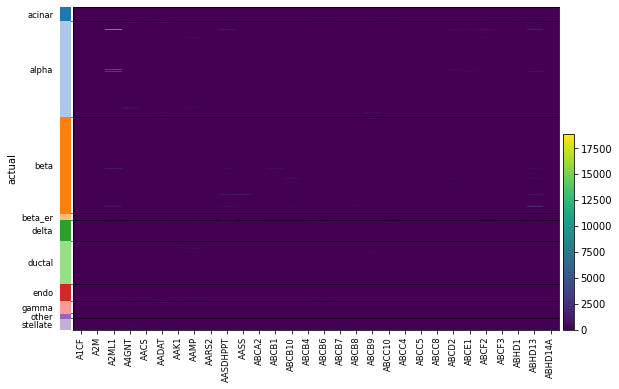

In [145]:
sc.pl.heatmap(adata,adata.var_names[:30],groupby='actual')